<a href="https://colab.research.google.com/github/Bhavishyakolloori/placement-project-logistic-Regression/blob/main/placement_project_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [7]:
df=df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt

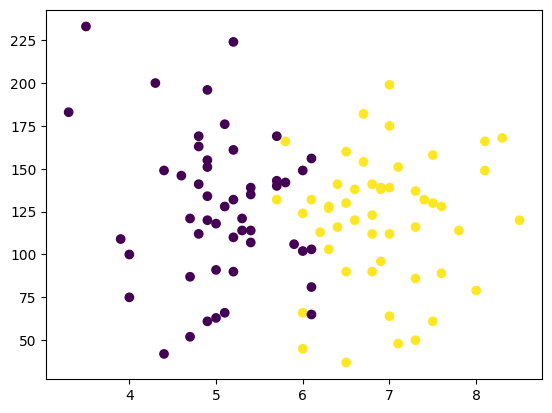

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [15]:
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
96,4.4,42.0
18,4.0,100.0
59,4.8,112.0
69,8.5,120.0
24,4.7,121.0
...,...,...
38,6.5,160.0
67,5.0,118.0
97,6.7,182.0
99,6.2,113.0


In [18]:
y_train

96    0
18    0
59    0
69    1
24    0
     ..
38    1
67    0
97    1
99    1
95    0
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

,cgpa,iq
28,5.2,90.0
54,6.4,141.0
74,6.7,154.0
73,4.9,61.0
50,3.5,233.0
60,6.9,139.0
23,4.7,87.0
44,7.5,61.0
79,6.5,90.0
92,5.2,110.0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_train

array([[-1.43072488, -2.14351152],
       [-1.78447553, -0.6339149 ],
       [-1.07697422, -0.32158457],
       [ 2.19521935, -0.11336434],
       [-1.16541188, -0.08733682],
       [-1.25384955,  0.56335138],
       [ 0.07271541, -1.12843793],
       [-0.72322356,  0.19896599],
       [ 1.22240505,  0.19896599],
       [ 0.86865439,  1.31814969],
       [ 1.84146869,  0.64143396],
       [-0.6347859 , -0.26952951],
       [ 0.95709205, -1.98734635],
       [ 0.51490373, -0.11336434],
       [-1.07697422,  1.00581936],
       [ 1.13396738, -1.9352913 ],
       [ 0.78021672,  0.35513116],
       [-0.90009889, -1.59693343],
       [ 0.78021672, -0.73802501],
       [-0.01572225, -0.58185985],
       [-0.98853656,  1.86472778],
       [-1.43072488,  0.64143396],
       [ 0.24959074,  0.06882835],
       [-1.16541188, -1.88323624],
       [-0.19259758,  1.08390194],
       [-0.98853656, -0.11336434],
       [ 1.31084271,  0.14691094],
       [ 0.07271541, -1.54487838],
       [-0.01572225,

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[-0.72322356, -0.89419018],
       [ 0.3380284 ,  0.43321374],
       [ 0.6033414 ,  0.7715716 ],
       [-0.98853656, -1.64898849],
       [-2.22666385,  2.82774631],
       [ 0.78021672,  0.38115869],
       [-1.16541188, -0.97227276],
       [ 1.31084271, -1.64898849],
       [ 0.42646607, -0.89419018],
       [-0.72322356, -0.37363962]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_test

28    0
54    1
74    1
73    0
50    0
60    1
23    0
44    1
79    1
92    0
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

1.0

In [33]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

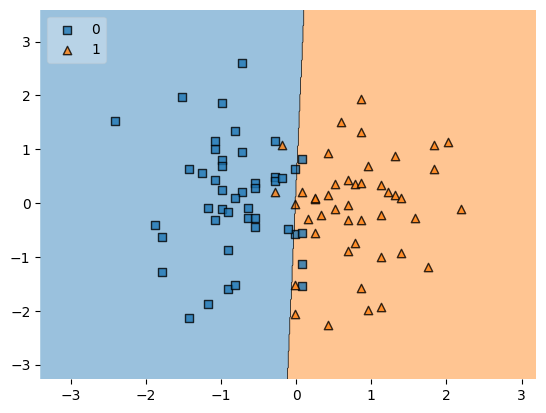

In [34]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [35]:
import pickle

In [36]:
pickle.dump(clf,open('model.pkl','wb'))